# Project 3: Policing Patterns by Demographics and Borough in NYC

## Import packages and dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/resource/8h9b-rp9u.csv?$limit=260000"
df = pd.read_csv(url)

df.head()


,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,lon_lat
0,298699270,2024-12-31T00:00:00.000,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,K,73,0,18-24,M,BLACK,1010536,178208,40.655787,-73.905263,POINT (-73.905263 40.655787)
1,298697557,2024-12-31T00:00:00.000,139.0,"MURDER,UNCLASSIFIED",101.0,MURDER & NON-NEGL. MANSLAUGHTE,PL 1252501,F,M,10,1,18-24,M,BLACK,984843,209263,40.741055,-73.997860,POINT (-73.99786005613711 40.741055152896635)
2,298672383,2024-12-31T00:00:00.000,782.0,"WEAPONS, POSSESSION, ETC",236.0,DANGEROUS WEAPONS,PL 2650101,M,M,9,0,45-64,M,WHITE HISPANIC,989431,201851,40.720710,-73.981309,POINT (-73.9813091658834 40.72070953128044)
3,298674995,2024-12-31T00:00:00.000,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,K,72,0,45-64,M,WHITE,980689,175856,40.649360,-74.012833,POINT (-74.01283282803469 40.64936000185553)
4,298685049,2024-12-31T00:00:00.000,106.0,ASSAULT POLICE/PEACE OFFICER,106.0,FELONY ASSAULT,PL 1200800,F,K,72,0,45-64,M,WHITE,980689,175856,40.649360,-74.012833,POINT (-74.01283282803469 40.64936000185553)


## Explore dataset

In [13]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   arrest_key         250000 non-null  int64  
 1   arrest_date        250000 non-null  object 
 2   pd_cd              249992 non-null  float64
 3   pd_desc            250000 non-null  object 
 4   ky_cd              249969 non-null  float64
 5   ofns_desc          250000 non-null  object 
 6   law_code           250000 non-null  object 
 7   law_cat_cd         248665 non-null  object 
 8   arrest_boro        250000 non-null  object 
 9   arrest_precinct    250000 non-null  int64  
 10  jurisdiction_code  250000 non-null  int64  
 11  age_group          250000 non-null  object 
 12  perp_sex           250000 non-null  object 
 13  perp_race          250000 non-null  object 
 14  x_coord_cd         250000 non-null  int64  
 15  y_coord_cd         250000 non-null  int64  
 16  la

- **Dataset(s) to be used:** [link]
- **Analysis question:** [How do arrest patterns differ by race, borough, or other factors (age, sex?)? Do arrests by type of offense vary by race?]
- **Columns that will (likely) be used:**
  - [perp_race]
  - [arrest_boro]
  - [age_group]
  - [etc]
- **Hypothesis**: [Arrest patterns are different across boroughs, racial groups, and offense categories in NYC. Particularly, there will be a disproportionate share of black and Hispanic arrests across boroughs.]

In [32]:
df["perp_race"].value_counts()

perp_race
BLACK                             121838
WHITE HISPANIC                     68975
BLACK HISPANIC                     26493
WHITE                              26108
ASIAN / PACIFIC ISLANDER           14812
AMERICAN INDIAN/ALASKAN NATIVE       818
Name: count, dtype: int64

In [33]:
df["arrest_boro"].value_counts()

arrest_boro
K    71988
M    61598
B    58150
Q    56337
S    10971
Name: count, dtype: int64

In [41]:
df["ofns_desc"].value_counts()

ofns_desc
ASSAULT 3 & RELATED OFFENSES        38007
PETIT LARCENY                       26971
FELONY ASSAULT                      22478
DANGEROUS DRUGS                     18456
MISCELLANEOUS PENAL LAW             16469
VEHICLE AND TRAFFIC LAWS            13641
OTHER OFFENSES RELATED TO THEFT     12595
ROBBERY                             11963
CRIMINAL MISCHIEF & RELATED OF      11789
GRAND LARCENY                       11757
DANGEROUS WEAPONS                   10723
OFFENSES AGAINST PUBLIC ADMINI       8654
BURGLARY                             6426
SEX CRIMES                           5897
FORGERY                              4944
OFFENSES INVOLVING FRAUD             4577
OFF. AGNST PUB ORD SENSBLTY &        4240
POSSESSION OF STOLEN PROPERTY        4032
OTHER STATE LAWS                     3921
CRIMINAL TRESPASS                    2752
INTOXICATED & IMPAIRED DRIVING       2558
OTHER TRAFFIC INFRACTION             2335
GRAND LARCENY OF MOTOR VEHICLE       2080
OFFENSES AGAINST THE PER

In [42]:
df["age_group"].value_counts()

age_group
25-44    151172
45-64     50852
18-24     42910
<18        9479
65+        4631
Name: count, dtype: int64

In [44]:
df = df.dropna(subset=["perp_race", "arrest_boro", "ofns_desc", "age_group"])
# just to make sure, doesn't look like any NAs
df = df[df["perp_race"] != "UNKNOWN"]
df = df[df["perp_race"] != "AMERICAN INDIAN/ALASKAN NATIVE"]  # small number so dropping


## Arrests by Race

In [45]:
race_counts = df["perp_race"].value_counts()
race_counts

perp_race
BLACK                       121838
WHITE HISPANIC               68975
BLACK HISPANIC               26493
WHITE                        26108
ASIAN / PACIFIC ISLANDER     14812
Name: count, dtype: int64

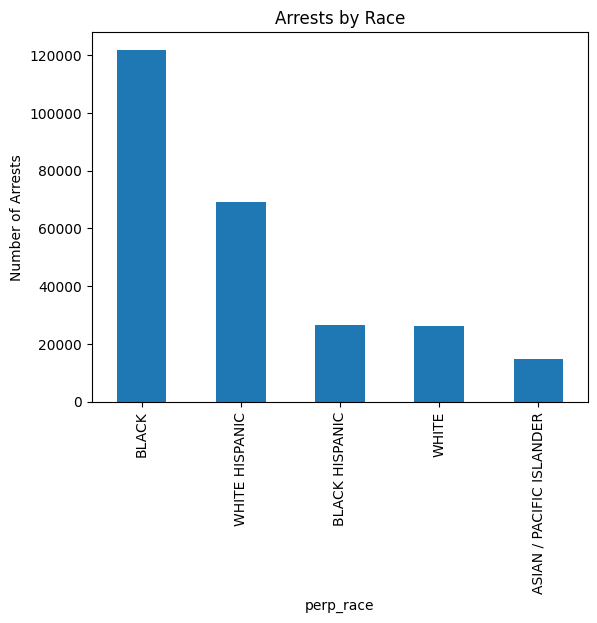

In [46]:
race_counts.plot(kind="bar", title="Arrests by Race")
plt.ylabel("Number of Arrests")
plt.show()


Citywide arrest counts show substantial differences across racial groups. Black and Hispanic individuals represent a larger share of arrests than other groups, disproportionate to their population share. These figures just reflect arrest frequency, not population-adjusted crime rates, so could simply be a measure of policing intensity. 

## Arrests by Borough

In [51]:
boro_map = {
    "B": "Bronx",
    "K": "Brooklyn",
    "M": "Manhattan",
    "Q": "Queens",
    "S": "Staten Island",
}

df["borough"] = df["arrest_boro"].map(boro_map)

In [52]:
boro_counts = df["borough"].value_counts()
boro_counts

borough
Brooklyn         71813
Manhattan        61405
Bronx            58041
Queens           56037
Staten Island    10930
Name: count, dtype: int64

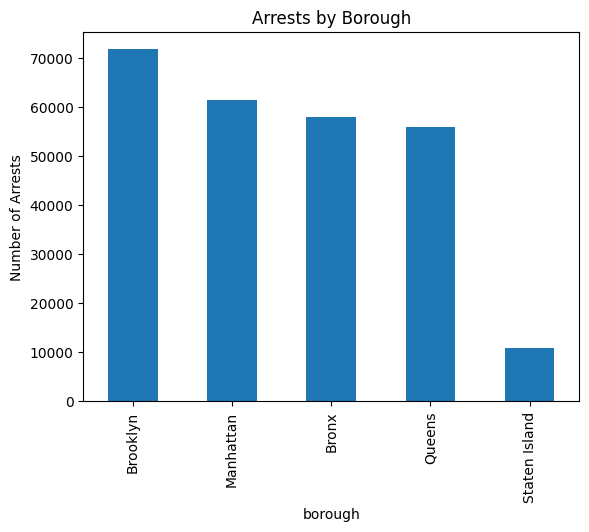

In [53]:
boro_counts.plot(kind="bar", title="Arrests by Borough")
plt.ylabel("Number of Arrests")
plt.show()

Brooklyn has the largest share of arrests, followed by Manhattan, The Bronx, and Queens. These roughly map with population, except The Bronx, which is significantly smaller than Queens but accounts for more arrests, and Manhattan, which is also smaller than Queens but accounts for more arrests. Either crime is lower in Queens, or policing intensity is lower. 

## Borough and Race

In [ ]:
grouped = df.groupby(["borough", "perp_race"]).size().reset_index(name="count")

grouped


,borough,perp_race,count
0,Bronx,ASIAN / PACIFIC ISLANDER,910
1,Bronx,BLACK,26939
2,Bronx,BLACK HISPANIC,11277
3,Bronx,WHITE,1805
4,Bronx,WHITE HISPANIC,17110
5,Brooklyn,ASIAN / PACIFIC ISLANDER,3621
6,Brooklyn,BLACK,40885
7,Brooklyn,BLACK HISPANIC,4123
8,Brooklyn,WHITE,8848
9,Brooklyn,WHITE HISPANIC,14336


In [ ]:
grouped["share"] = grouped["count"] / grouped.groupby("borough")["count"].transform(
    "sum"
)

In [56]:
grouped_pivot = grouped.pivot(index="borough", columns="perp_race", values="share")
grouped_pivot

perp_race,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
borough,,,,,
Bronx,0.015679,0.464137,0.194294,0.031099,0.294792
Brooklyn,0.050423,0.569326,0.057413,0.123209,0.199630
Manhattan,0.038498,0.480824,0.114828,0.117955,0.247895
Queens,0.132734,0.354337,0.062887,0.093296,0.356746
Staten Island,0.043824,0.423879,0.047392,0.273010,0.211894


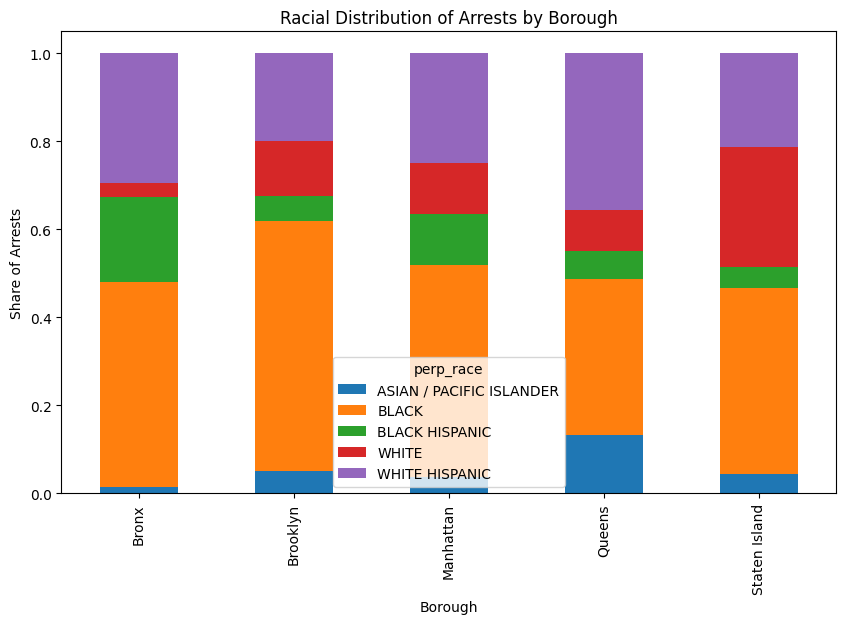

In [ ]:
grouped_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Racial Distribution of Arrests by Borough")
plt.ylabel("Share of Arrests")
plt.xlabel("Borough")
plt.show()

Each borough shows a slightly different distributions of arrests by race.
Queens has a relatively higher share of Asian arrests, reflecting a larger Asian population. SI obviously has a larger white share, while Brooklyn has the largest Black share and the Bronx has the highest Hispanic share. 

## Arrests by Offense Type and Race

In [61]:
top_offenses = df["ofns_desc"].value_counts().head(11)
top_offenses

ofns_desc
ASSAULT 3 & RELATED OFFENSES       37808
PETIT LARCENY                      26893
FELONY ASSAULT                     22400
DANGEROUS DRUGS                    18428
MISCELLANEOUS PENAL LAW            16419
VEHICLE AND TRAFFIC LAWS           13584
OTHER OFFENSES RELATED TO THEFT    12567
ROBBERY                            11953
CRIMINAL MISCHIEF & RELATED OF     11752
GRAND LARCENY                      11728
DANGEROUS WEAPONS                  10699
Name: count, dtype: int64

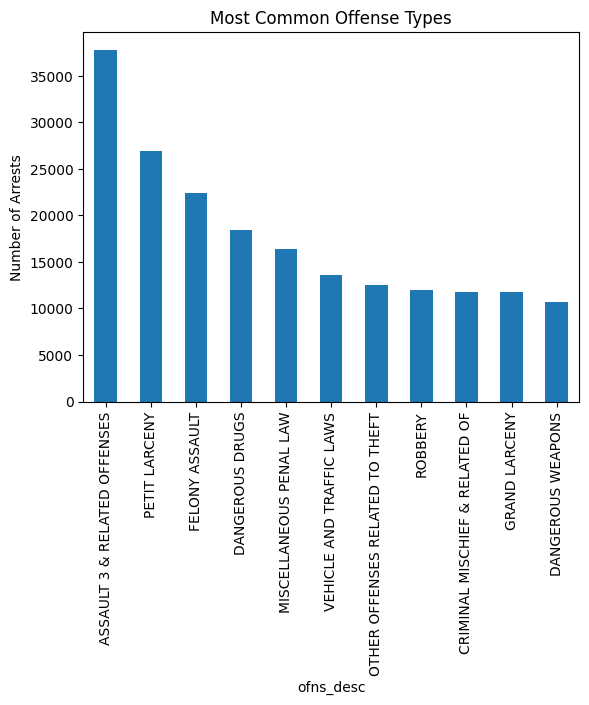

In [59]:
top_offenses.plot(kind="bar", title="Most Common Offense Types")
plt.ylabel("Number of Arrests")
plt.show()

In [62]:
top_offenses = df["ofns_desc"].value_counts().head(11).index
offense_df = df[df["ofns_desc"].isin(top_offenses)]

In [ ]:
offense_grouped = (
    offense_df.groupby(["ofns_desc", "perp_race"]).size().reset_index(name="count")
)
offense_grouped.head()


,ofns_desc,perp_race,count
0,ASSAULT 3 & RELATED OFFENSES,ASIAN / PACIFIC ISLANDER,2715
1,ASSAULT 3 & RELATED OFFENSES,BLACK,17322
2,ASSAULT 3 & RELATED OFFENSES,BLACK HISPANIC,3591
3,ASSAULT 3 & RELATED OFFENSES,WHITE,3305
4,ASSAULT 3 & RELATED OFFENSES,WHITE HISPANIC,10875


In [ ]:
offense_grouped["share"] = offense_grouped["count"] / offense_grouped.groupby(
    "ofns_desc"
)["count"].transform("sum")
offense_grouped.head()
# this converts counts to % (share) within each type


,ofns_desc,perp_race,count,share
0,ASSAULT 3 & RELATED OFFENSES,ASIAN / PACIFIC ISLANDER,2715,0.071810
1,ASSAULT 3 & RELATED OFFENSES,BLACK,17322,0.458157
2,ASSAULT 3 & RELATED OFFENSES,BLACK HISPANIC,3591,0.094980
3,ASSAULT 3 & RELATED OFFENSES,WHITE,3305,0.087415
4,ASSAULT 3 & RELATED OFFENSES,WHITE HISPANIC,10875,0.287638


In [ ]:
offense_pivot = offense_grouped.pivot(
    index="ofns_desc", columns="perp_race", values="share"
)
offense_pivot


perp_race,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
ofns_desc,,,,,
ASSAULT 3 & RELATED OFFENSES,0.071810,0.458157,0.094980,0.087415,0.287638
CRIMINAL MISCHIEF & RELATED OF,0.057352,0.468346,0.087219,0.144061,0.243022
DANGEROUS DRUGS,0.048893,0.464402,0.102127,0.131159,0.253419
DANGEROUS WEAPONS,0.038228,0.585382,0.098327,0.075708,0.202355
FELONY ASSAULT,0.072054,0.478795,0.100089,0.077188,0.271875
GRAND LARCENY,0.042633,0.444407,0.120992,0.108373,0.283595
MISCELLANEOUS PENAL LAW,0.075340,0.485474,0.086972,0.118460,0.233754
OTHER OFFENSES RELATED TO THEFT,0.019893,0.609215,0.078141,0.064932,0.227819
PETIT LARCENY,0.046741,0.408396,0.090990,0.168185,0.285688


In [68]:
offense_pivot = offense_pivot.loc[top_offenses]

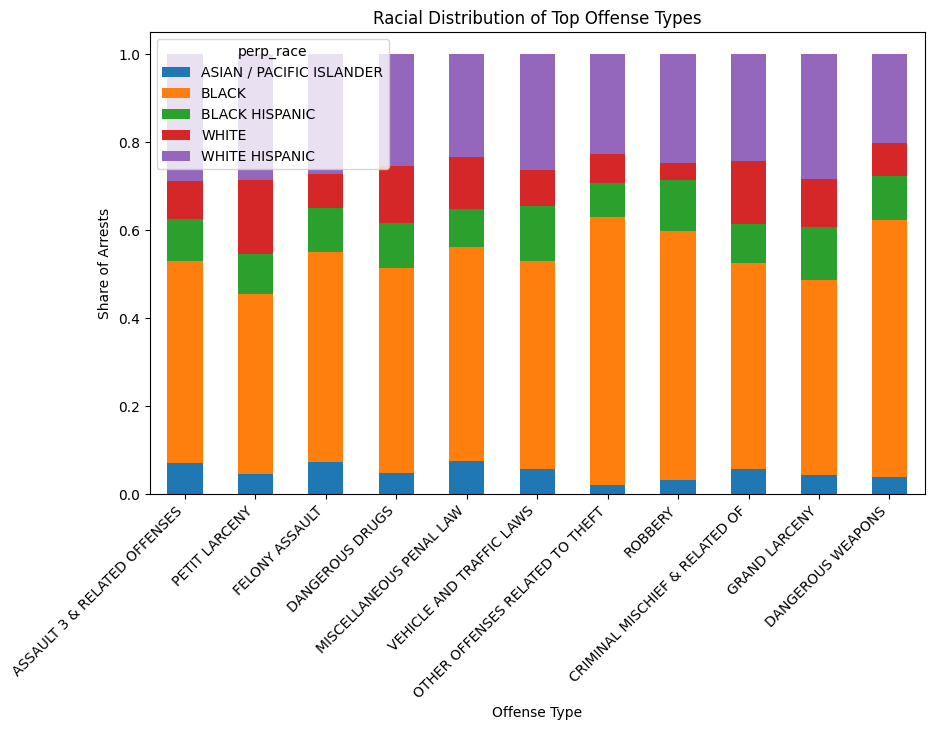

In [ ]:
offense_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Racial Distribution of Top Offense Types")
plt.ylabel("Share of Arrests")
plt.xlabel("Offense Type")
plt.xticks(rotation=45, ha="right")
plt.show()

In [75]:
offense_race_grouped = offense_grouped.copy()

offense_race_grouped["share"] = offense_race_grouped[
    "count"
] / offense_race_grouped.groupby("perp_race")["count"].transform("sum")

In [76]:
offense_race_pivot = offense_race_grouped.pivot(
    index="perp_race", columns="ofns_desc", values="share"
)

offense_race_pivot


ofns_desc,ASSAULT 3 & RELATED OFFENSES,CRIMINAL MISCHIEF & RELATED OF,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,GRAND LARCENY,MISCELLANEOUS PENAL LAW,OTHER OFFENSES RELATED TO THEFT,PETIT LARCENY,ROBBERY,VEHICLE AND TRAFFIC LAWS
perp_race,,,,,,,,,,,
ASIAN / PACIFIC ISLANDER,0.253076,0.062826,0.083986,0.038125,0.150447,0.046607,0.115306,0.023304,0.117170,0.035887,0.073266
BLACK,0.185528,0.058951,0.091661,0.067080,0.114871,0.055823,0.085374,0.082000,0.117634,0.072382,0.068697
BLACK HISPANIC,0.187608,0.053550,0.098323,0.054961,0.117131,0.074134,0.074604,0.051303,0.127841,0.072044,0.088501
WHITE,0.164477,0.084254,0.120285,0.040311,0.086046,0.063253,0.096795,0.040609,0.225092,0.023888,0.054992
WHITE HISPANIC,0.213646,0.056108,0.091745,0.042533,0.119642,0.065341,0.075400,0.056245,0.150937,0.057974,0.070429


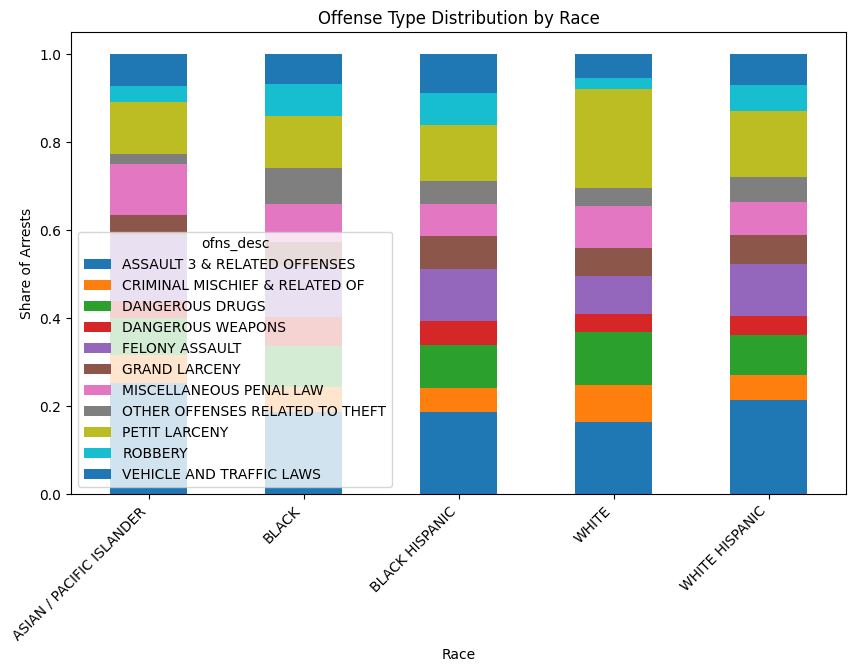

In [77]:
offense_race_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Offense Type Distribution by Race")
plt.ylabel("Share of Arrests")
plt.xlabel("Race")
plt.xticks(rotation=45, ha="right")
plt.show()

There are still not many meaningful takeaways from redoing this to be more legible, although there are some minor distinctions between offense type distribution by race. 

## Offense Type by Borough

In [70]:
offense_borough_grouped = (
    df[df["ofns_desc"].isin(top_offenses)]
    .groupby(["ofns_desc", "borough"])
    .size()
    .reset_index(name="count")
)

offense_borough_grouped.head()

,ofns_desc,borough,count
0,ASSAULT 3 & RELATED OFFENSES,Bronx,9610
1,ASSAULT 3 & RELATED OFFENSES,Brooklyn,10306
2,ASSAULT 3 & RELATED OFFENSES,Manhattan,7240
3,ASSAULT 3 & RELATED OFFENSES,Queens,9136
4,ASSAULT 3 & RELATED OFFENSES,Staten Island,1516


In [ ]:
offense_borough_grouped["share"] = offense_borough_grouped[
    "count"
] / offense_borough_grouped.groupby("borough")["count"].transform("sum")

offense_borough_grouped.head()

,ofns_desc,borough,count,share
0,ASSAULT 3 & RELATED OFFENSES,Bronx,9610,0.219512
1,ASSAULT 3 & RELATED OFFENSES,Brooklyn,10306,0.187798
2,ASSAULT 3 & RELATED OFFENSES,Manhattan,7240,0.158964
3,ASSAULT 3 & RELATED OFFENSES,Queens,9136,0.220564
4,ASSAULT 3 & RELATED OFFENSES,Staten Island,1516,0.176115


In [ ]:
offense_borough_pivot = offense_borough_grouped.pivot(
    index="borough", columns="ofns_desc", values="share"
)

offense_borough_pivot

ofns_desc,ASSAULT 3 & RELATED OFFENSES,CRIMINAL MISCHIEF & RELATED OF,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,GRAND LARCENY,MISCELLANEOUS PENAL LAW,OTHER OFFENSES RELATED TO THEFT,PETIT LARCENY,ROBBERY,VEHICLE AND TRAFFIC LAWS
borough,,,,,,,,,,,
Bronx,0.219512,0.060394,0.089084,0.056260,0.136367,0.045387,0.067407,0.078919,0.093926,0.070445,0.082300
Brooklyn,0.187798,0.064525,0.099165,0.070957,0.109734,0.046448,0.101553,0.068625,0.114053,0.057418,0.079722
Manhattan,0.158964,0.058184,0.108310,0.042595,0.091865,0.097596,0.052937,0.076781,0.213635,0.062027,0.037106
Queens,0.220564,0.056855,0.076217,0.048743,0.129765,0.056059,0.105164,0.039014,0.136549,0.063470,0.067599
Staten Island,0.176115,0.065288,0.115706,0.044493,0.098629,0.049373,0.131041,0.027068,0.131970,0.030669,0.129647


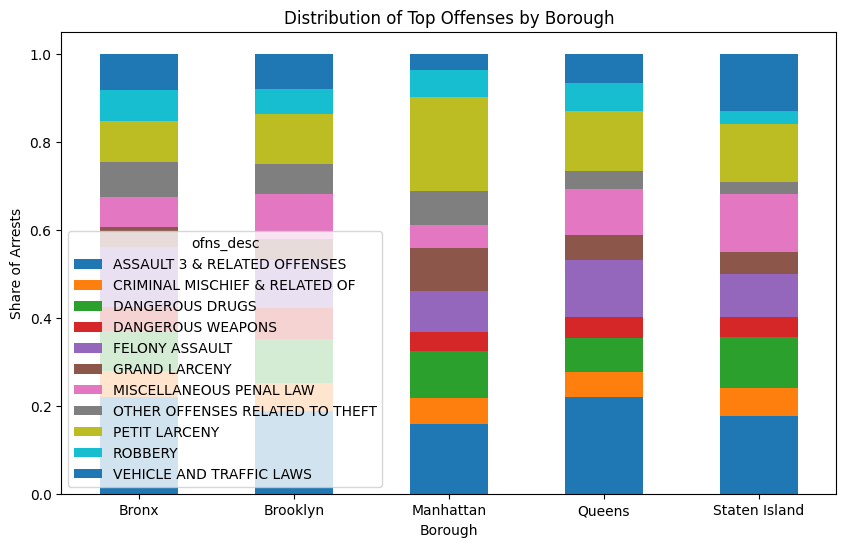

In [ ]:
offense_borough_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Distribution of Top Offenses by Borough")
plt.ylabel("Share of Arrests")
plt.xlabel("Borough")
plt.xticks(rotation=0)
plt.show()

There are some differences in share of offense type share by borough, with Manhattan showing higher rates of theft and lower rates of vehicular and assault offenses, for example.

## Limitations
This analysis does not account for population size, demographics, or other variation that may exist between boroughs. It also may reflect policing patterns rather than actual crime data. There may be error bias as well. Offense categories are broad and not necessarily the most useful in doing this type of analysis. This also does not show changes over time, as this data is primarily from 2024. 

## Overall, NYC arrest data does show some patterns, but arrests do not vary significantly across boroughs or offense type, except for some outliers. What is notable is that, as hypothesized, there are much higher than proportional shares of arrests of Black and Hispanic people in NYC. 